In [1]:
import pandas as pd
import seaborn as sb
low_memory = True
%matplotlib inline
pd.options.display.max_columns = 80
pd.options.display.max_rows = 90

In [2]:
df = pd.read_csv('cursos-prouni-2018.csv')

In [3]:
df.shape

(41447, 16)

In [4]:
df.describe()

,mensalidade,bolsa_integral_cotas,bolsa_integral_ampla,bolsa_parcial_cotas,bolsa_parcial_ampla,nota_integral_ampla,nota_integral_cotas,nota_parcial_ampla,nota_parcial_cotas
count,41447.000000,32520.000000,25404.000000,8828.000000,13041.000000,32520.000000,16802.000000,16350.000000,5519.000000
mean,622.636966,1.535394,2.513541,1.873018,8.632544,575.982999,564.470439,527.517136,511.799638
std,606.442296,2.191578,3.019549,2.336403,18.372991,57.827594,57.869145,60.202170,56.787140
min,139.000000,0.000000,1.000000,1.000000,1.000000,450.000000,450.000000,450.000000,450.000000
25%,278.000000,0.000000,1.000000,1.000000,1.000000,544.360000,532.865000,453.980000,450.000000
50%,393.350000,1.000000,1.000000,1.000000,2.000000,580.740000,571.450000,532.420000,511.820000
75%,825.000000,2.000000,3.000000,2.000000,6.000000,614.145000,603.315000,573.235000,557.170000
max,9999.990000,58.000000,67.000000,74.000000,350.000000,781.200000,792.240000,776.360000,768.340000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41447 entries, 0 to 41446
Data columns (total 16 columns):
uf_busca                41447 non-null object
cidade_busca            41447 non-null object
universidade_nome       41447 non-null object
campus_nome             41447 non-null object
nome                    41447 non-null object
grau                    41447 non-null object
turno                   41447 non-null object
mensalidade             41447 non-null float64
bolsa_integral_cotas    32520 non-null float64
bolsa_integral_ampla    25404 non-null float64
bolsa_parcial_cotas     8828 non-null float64
bolsa_parcial_ampla     13041 non-null float64
nota_integral_ampla     32520 non-null float64
nota_integral_cotas     16802 non-null float64
nota_parcial_ampla      16350 non-null float64
nota_parcial_cotas      5519 non-null float64
dtypes: float64(9), object(7)
memory usage: 4.0+ MB


In [6]:
df.rename(
    columns = {
        'uf_busca': 'UF',
        'cidade_busca': 'CIDADE',
        'universidade_nome': 'UNIVERSIDADE',
        'campus_nome': 'CAMPUS',
        'nome': 'CURSO',
        'grau': 'GRAU',
        'turno': 'TURNO',
        'mensalidade': 'MENSALIDADE',
        'bolsa_integral_cotas': 'BOLSA_INTEGRAL_COTAS',
        'bolsa_integral_ampla': 'BOLSA_INTEGRAL_AMPLA',
        'bolsa_parcial_cotas': 'BOLSA_PARCIAL_COTAS',
        'bolsa_parcial_ampla': 'BOLSA_PARCIAL_AMPLA',
        'nota_integral_ampla': 'NOTAI_CORTE_AMPLA',
        'nota_integral_cotas': 'NOTAI_CORTE_COTAS',
        'nota_parcial_ampla': 'NOTAP_CORTE_AMPLA',
        'nota_parcial_cotas': 'NOTAP_CORTE_COTAS'
    }, 
    inplace=True
)

In [7]:
df.sample(10)

,UF,CIDADE,UNIVERSIDADE,CAMPUS,CURSO,GRAU,TURNO,MENSALIDADE,BOLSA_INTEGRAL_COTAS,BOLSA_INTEGRAL_AMPLA,BOLSA_PARCIAL_COTAS,BOLSA_PARCIAL_AMPLA,NOTAI_CORTE_AMPLA,NOTAI_CORTE_COTAS,NOTAP_CORTE_AMPLA,NOTAP_CORTE_COTAS
29978,SP,Ibate,Universidade Paulista - UNIP,IBATE - Vl. Tamoio,Logística,Tecnológico,Curso a Distância,299.0,0.0,1.0,NaN,NaN,563.18,NaN,NaN,NaN
4781,PR,Paranavai,Centro Universitário Internacional - Uninter -...,PAP PARANAVAÍ - Centro,Artes VIsuais,Licenciatura,Curso a Distância,237.0,NaN,NaN,NaN,1.0,NaN,NaN,505.16,NaN
27760,SP,Sao Paulo,Universidade Nove de Julho - UNINOVE,VILA PRUDENTE - Vila Prudente,História,Licenciatura,Curso a Distância,257.0,2.0,4.0,NaN,NaN,548.86,557.34,NaN,NaN
31822,SP,Santos,Universidade Paulista - UNIP,SANTOS II - Boqueirão,Matemática,Licenciatura,Curso a Distância,299.0,0.0,1.0,NaN,NaN,557.98,NaN,NaN,NaN
39589,RJ,Angra dos Reis,Universidade Anhanguera - UNIDERP,ANGRA DOS REIS/RJ (2008632) - Centro,Serviço Social,Bacharelado,Curso a Distância,279.0,2.0,2.0,NaN,NaN,543.84,568.00,NaN,NaN
34578,PR,Londrina,Faculdade do Norte Novo de Apucarana - FACNOPAR,NEOEDUC DESENVOLVIMENTO EDUCACIONAL LTDA ME - ...,Pedagogia,Licenciatura,Curso a Distância,233.9,1.0,3.0,NaN,NaN,501.78,461.10,NaN,NaN
5251,BA,Feira de Santana,Faculdade de Ensino Superior da Cidade de Feir...,UNIDADE UNEF - LUIS EDUARDO MAGALHÃES - Subaé,Biomedicina,Bacharelado,Matutino,960.0,NaN,NaN,2.0,NaN,NaN,NaN,628.80,NaN
36954,SP,Marilia,Faculdade de Ensino Superior do Interior Pauli...,CAMPUS - MARÍLIA - Jardim Santa Antonieta,Produção Publicitária,Tecnológico,Noturno,744.4,NaN,NaN,1.0,5.0,NaN,NaN,548.08,503.2
33932,MG,Itajuba,Universidade Pitágoras Unopar,ITAJUBA/MG (8042) - Varginha,Pedagogia,Licenciatura,Curso a Distância,279.0,4.0,3.0,NaN,NaN,590.12,534.46,NaN,NaN
10285,MG,Belo Horizonte,Faculdade Promove de Belo Horizonte - PROMOVE,UNIDADE TIMBIRAS - Centro,Direito,Bacharelado,Matutino,1535.0,4.0,3.0,NaN,NaN,636.02,619.16,NaN,NaN


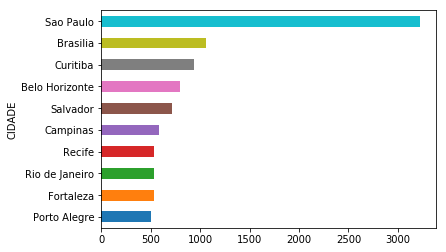

In [14]:
df.groupby('CIDADE').size().sort_values().tail(10).plot(kind='barh')